# Analyse prédictive de la survie des passagers du titanic

## Première partie : Analyse exploratoire des données

Notre objectif est de déterminer quelles variables a pu influencer la survie ou non des passagers du titanic. La première chose à faire est d'analyser les données et de les nettoyer 

In [ ]:
#Chargement des packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Dans cette partie, numpy nous sera utile pour les tableaux, pandas pour l'importation et la transformation de la base de donnée, seaborn et matplotlib seront utiles pour les graphiques. Dans la seconde partie nous aurons besoin du package sklearn pour les modèles de machine learning.

In [ ]:
#Importation des données (données à mettre sur github)
data = pd.read_excel("C:/Users/lenny/OneDrive/Documents/Entrainement_ML_DL/titanicdata.xls")
#Suppression des colonnes inutiles
data_p = data.drop(['name','boat','body','sibsp', 'parch', 'ticket','fare','cabin','embarked','home.dest'], axis=1)

#On va donc s'interesser aux passagers qui ont survécus en fonction de leur âge, de leur sexe et de la classe de leurs billets

#Suppression des valeurs manquantes pour l'âge
data_p =data_p.dropna(axis=0)

# On peut faire une analyse descriptives des données à ce stade
data_p.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


On remarque qu'on a ici 1046 individus dont environ 40% ont survécu au naufrage. La moyenne d'âge est d'environ 30 ans avec un écart type d'environ 14 ans.

In [86]:
data_p['pclass'].value_counts()

pclass
3    501
1    284
2    261
Name: count, dtype: int64

On remarque que la classe de billet la plus représentée est la classe 3 qui est la classe ou le billet était le moins cher. 

<Axes: >

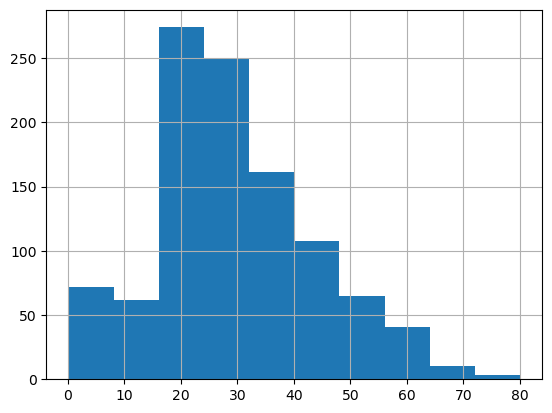

In [87]:
data_p['age'].hist()

On remarque sur cette distribution des âges qu'il y a une forte représentation de personne autour 20 à 30 ans, avec une diminution progressive de l'âge pour les personnes plus âgées et une forte diminution quand l'âge est inférieur à la vingtaine.

In [88]:
data_p.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

Avec la fonction groupby on peut faire des analyses plus précises sur les personnes qui ont survécues ou non. Dans chaque classe, les femmes ont un taux de survie plus élevés que les hommes et les classes de billets les plus chères ont un taux de survie plus élevés. La moyenne d'âge est plus élevée pour les classes de billets les plus prestigieuses car les personnes plus âgées ont la capacité de payer plus cher leurs billets.

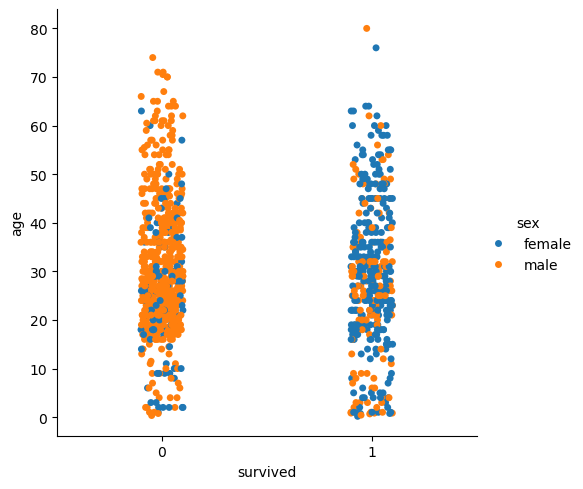

In [89]:
sns.catplot(x='survived', y= 'age', data = data_p, hue = 'sex')

On remarque que la majorité des survivants sont des femmes.
Quelle explication donner à cela ? Dans un mouvement de panique, il est fort probable qu'il fallait faire des choix et qu'on a privilégié "les femmes et les enfants d'abord"

<Axes: xlabel='pclass', ylabel='age'>

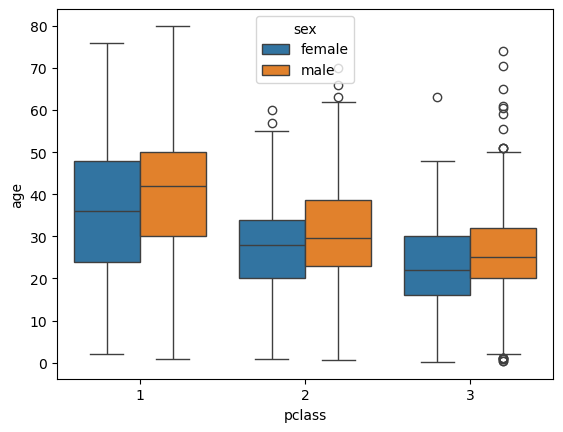

In [90]:
sns.boxplot(x='pclass',y='age', data = data_p, hue = 'sex')

Cette boxplot nous permet d'observer différemment (mais avec les mêmes résultats) ce qu'on a pu observer avec la fonction groupby, hormis pour les taux de survie.

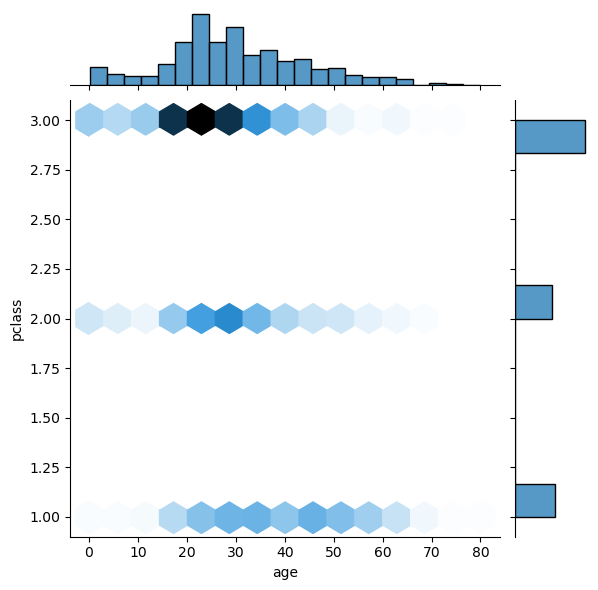

In [91]:
sns.jointplot(x='age',y='pclass', data= data_p, kind='hex')

Le graphique ci-dessus nous aide à observe les distributions des âges pour chaque classe de billets.

<Axes: >

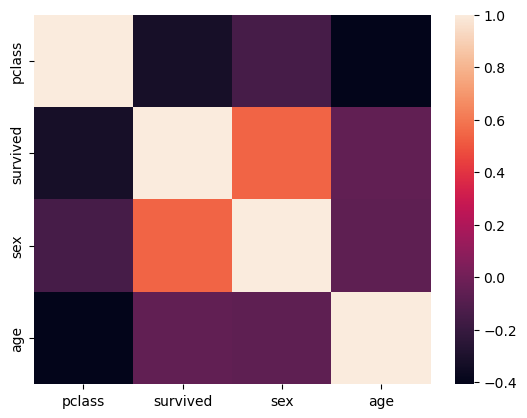

In [109]:
data_p['sex'] = data_p['sex'].replace(['male','female'],[0,1])

sns.heatmap(data_p.corr())

Cette matrice de corrélation permet de voir certaines choses facilement. Déjà il faut savoir qu'on a remplacé dans notre jeu de donnée 'male' par 0 et 'female' par 1 pour avoir des variables numériques. 

De cette matrice de corrélation on peut dire que:

-Plus on est âgé, plus on prend un billet cher (classe 1)

-Les femmes ont plus de chances de survie que les hommes

-Les personnes ayant un billet pour les classes les moins chères (classe 3) ont moins survécues que les autres.

On a terminé notre analyse de données. 
Maintenant on peut passer à la deuxième partie, qui consiste à se demander si j'aurais survécu au titanic.

## Programme de machine learning pour la survie au titanic

Maintenant, on peut utiliser sklearn pour faire un programme de machine learning adapté pour savoir si l'on aurait survécu ou non au titanic

In [110]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
y = data_p['survived']
X = data_p.drop('survived', axis = 1)
model.fit(X,y)
model.score(X,y)


0.8317399617590823

Notre modèle aura la bonne prédiction 83% du temps. Faisons une fonction qui permet de donner nos propres caractéristiques.

In [113]:
def ma_survie_titanic3 (model, pclass = 3,sex=0, age = 22):
    x = pd.DataFrame([[pclass, sex, age]], columns=['pclass', 'sex', 'age'])
    prediction = model.predict(x)[0]
    proba = model.predict_proba(x)[0]
    print(f"Classe : {prediction} ({'Survie' if prediction == 1 else 'Décès'})")
    print(f"Probabilité de décès   : {proba[0]*100:.2f}%")
    print(f"Probabilité de survie  : {proba[1]*100:.2f}%")

ma_survie_titanic3(model)

Classe : 0 (Décès)
Probabilité de décès   : 100.00%
Probabilité de survie  : 0.00%


Dans le cas où j'aurais pris un billet de classe 3, je n'aurais pas survécu avec une probabilité de 100% selon le modèle.

In [114]:
def ma_survie_titanic2 (model, pclass = 2,sex=0, age = 22):
    x = pd.DataFrame([[pclass, sex, age]], columns=['pclass', 'sex', 'age'])
    prediction = model.predict(x)[0]
    proba = model.predict_proba(x)[0]
    print(f"Classe : {prediction} ({'Survie' if prediction == 1 else 'Décès'})")
    print(f"Probabilité de décès   : {proba[0]*100:.2f}%")
    print(f"Probabilité de survie  : {proba[1]*100:.2f}%")

ma_survie_titanic2(model)

Classe : 1 (Survie)
Probabilité de décès   : 40.00%
Probabilité de survie  : 60.00%


Dans le cas où j'aurais pris un billet de classe 2, j'aurais eu 60% de chances de survivre. D'ailleurs ces résultats sont les mêmes pour la première classe

In [115]:
def ma_survie_titanic1 (model, pclass = 1,sex=0, age = 22):
    x = pd.DataFrame([[pclass, sex, age]], columns=['pclass', 'sex', 'age'])
    prediction = model.predict(x)[0]
    proba = model.predict_proba(x)[0]
    print(f"Classe : {prediction} ({'Survie' if prediction == 1 else 'Décès'})")
    print(f"Probabilité de décès   : {proba[0]*100:.2f}%")
    print(f"Probabilité de survie  : {proba[1]*100:.2f}%")

ma_survie_titanic1(model)

Classe : 1 (Survie)
Probabilité de décès   : 40.00%
Probabilité de survie  : 60.00%


 En conclusion je n'aurais pas survécu si j'avais pris la classe 3 mais j'aurais probablement survécu si j'avais eu la classe 2 ou 1 avec une probabilité de 60%. 